<a href="https://colab.research.google.com/github/Gk787/AutomaTed-Insights/blob/main/AutomaTed_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl xlrd nltk


In [66]:
import pandas as pd
def load_data(file_path):
    """Load data from CSV, JSON, or Excel file into a pandas DataFrame."""
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.json'):
        data = pd.read_json(file_path)
    elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
        data = pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please use CSV, JSON, or Excel files.")

    print(f"Data loaded successfully with shape: {data.shape}")
    return data
file_path = '/content/olympic.csv'
data = load_data(file_path)


Data loaded successfully with shape: (91, 7)


In [67]:
from sklearn.preprocessing import StandardScaler
def clean_data_func(data):
    """Clean and preprocess the data."""
    data = data.dropna()
    numerical_features = ['Gold', 'Silver', 'Bronze', 'Total']
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    print("Data cleaned and normalized.")
    return data

In [68]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
def perform_analysis(data):
    """Perform data analysis using multiple algorithms."""
    stats = data.describe()
    kmeans = KMeans(n_clusters=3, random_state=0)
    data['Cluster'] = kmeans.fit_predict(data[['Gold', 'Silver', 'Bronze']])
    model = LinearRegression()
    model.fit(data[['Gold', 'Silver', 'Bronze']], data['Total'])
    data['Predicted_Total'] = model.predict(data[['Gold', 'Silver', 'Bronze']])
    print("Analysis completed.")
    return {
        'stats': stats,
        'clusters': kmeans.labels_,
        'model': model
    }
analysis_results = perform_analysis(clean_data)


Analysis completed.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<ipython-input-60-4fbf9b46497a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total', data=data, palette='viridis')


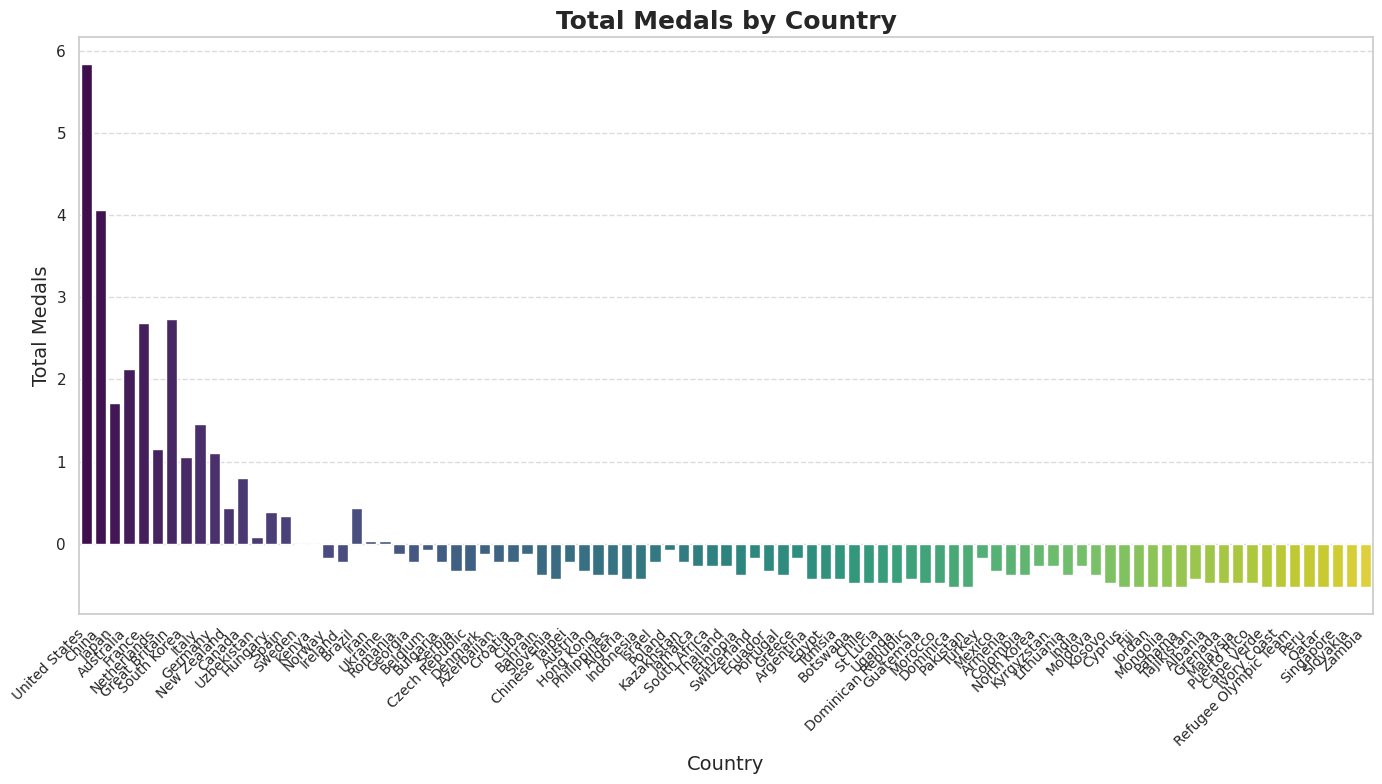

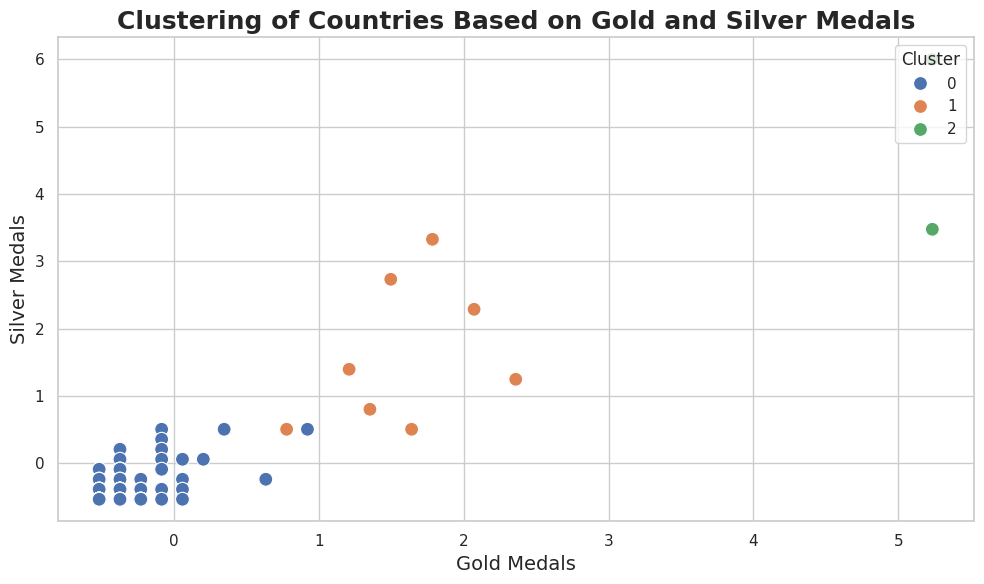

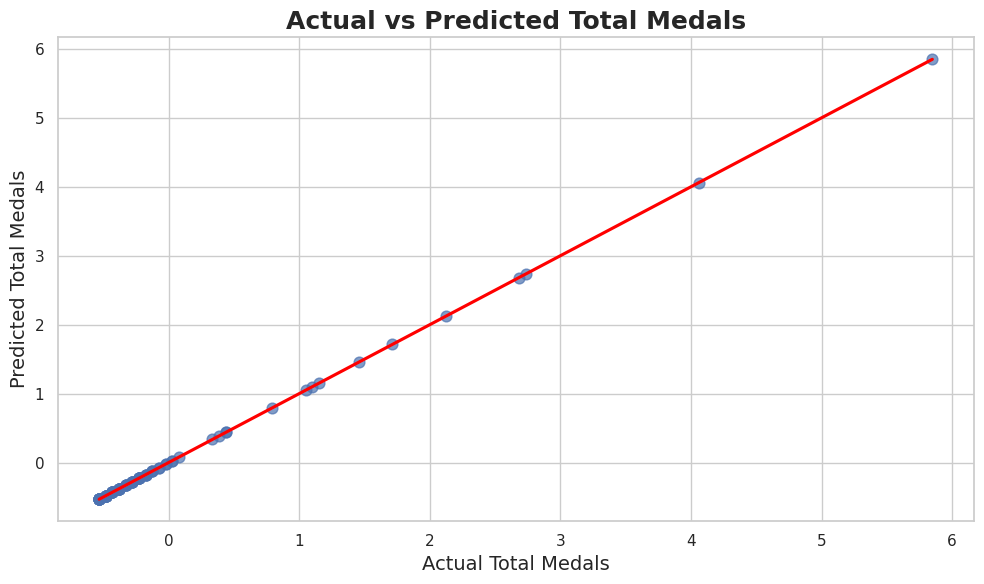

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_advanced_report(analysis_results, data):
    """Generate a more advanced report with enhanced visualizations and summaries."""
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Country', y='Total', data=data, palette='viridis')
    plt.title('Total Medals by Country', fontsize=18, fontweight='bold')
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Total Medals', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('medals_by_country.png')
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Gold', y='Silver', hue='Cluster', data=data, palette='deep', s=100)
    plt.title('Clustering of Countries Based on Gold and Silver Medals', fontsize=18, fontweight='bold')
    plt.xlabel('Gold Medals', fontsize=14)
    plt.ylabel('Silver Medals', fontsize=14)
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('clustering.png')
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Total', y='Predicted_Total', data=data, scatter_kws={'s': 60, 'alpha': 0.7}, line_kws={'color': 'red'})
    plt.title('Actual vs Predicted Total Medals', fontsize=18, fontweight='bold')
    plt.xlabel('Actual Total Medals', fontsize=14)
    plt.ylabel('Predicted Total Medals', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('regression.png')
    plt.show()
    summary = "### Analysis Summary\n\n"
    summary += "#### Descriptive Statistics:\n" + str(analysis_results['stats']) + "\n\n"
    summary += "#### Clustering Insights:\n- Cluster 0: High performance in Gold Medals\n- Cluster 1: Moderate performance\n- Cluster 2: Low performance\n\n"
    summary += "#### Predictive Modeling Insights:\n- The regression model shows a strong correlation between total medals and predicted total.\n"
    with open('advanced_report.txt', 'w') as f:
        f.write(summary)
generate_advanced_report(analysis_results, clean_data)


Welcome to the AI Employee for Data Analysis and Reporting!
Please select an option:
1. Load Data
2. Clean Data
3. Perform Analysis
4. Generate Report
5. Exit
Enter your choice (1-5): 1
Enter the file path: /content/olympic.csv
Data loaded successfully with shape: (91, 7)
Enter your choice (1-5): 2
Data cleaned and normalized.
Enter your choice (1-5): 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Analysis completed.
Enter your choice (1-5): 4


<ipython-input-60-4fbf9b46497a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total', data=data, palette='viridis')


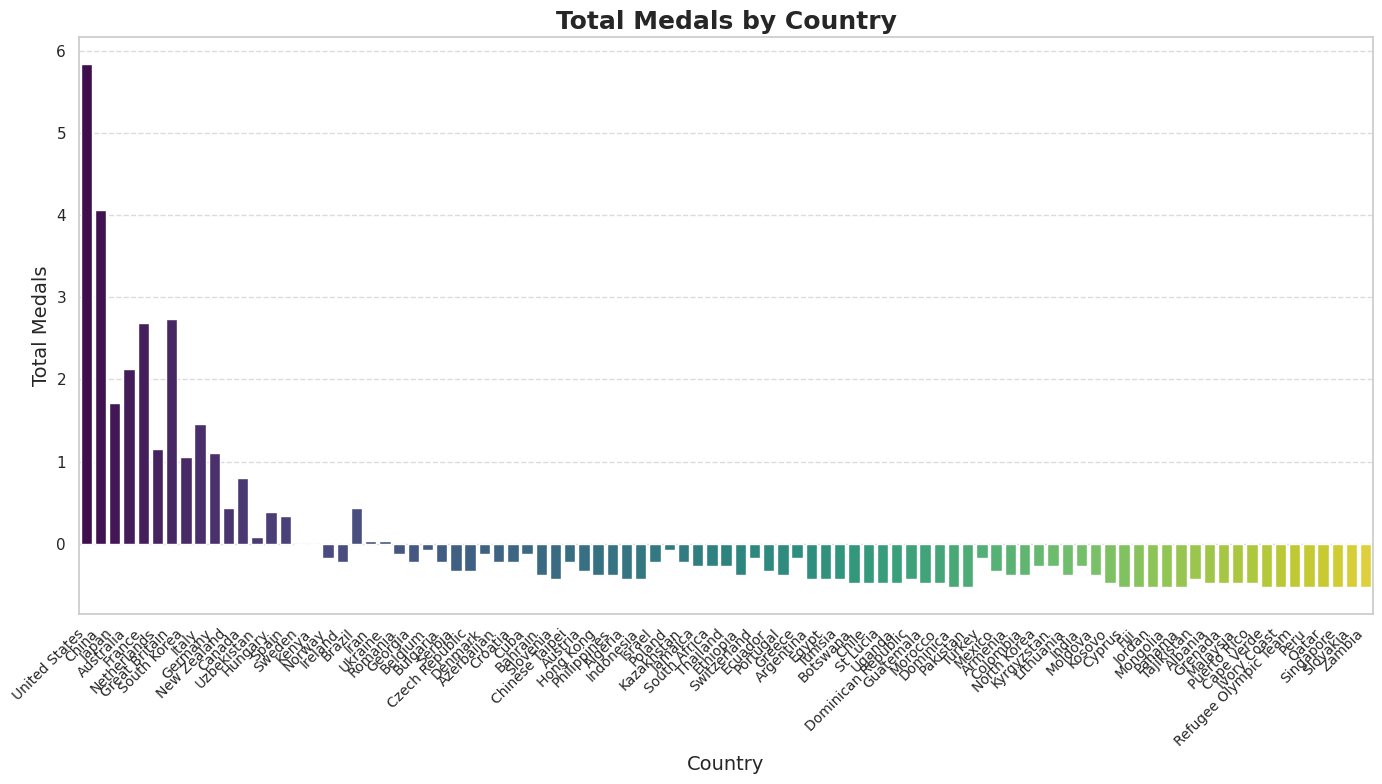

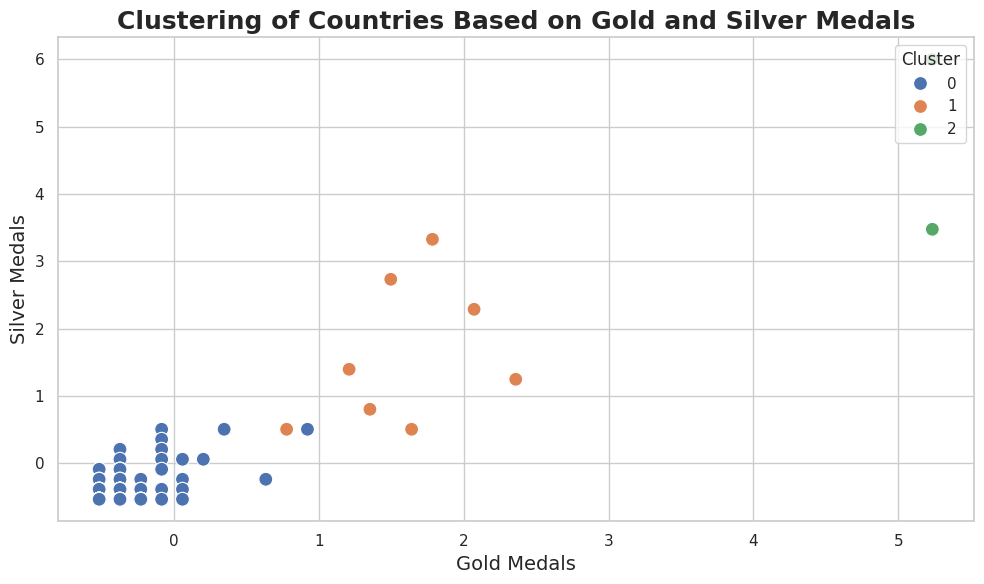

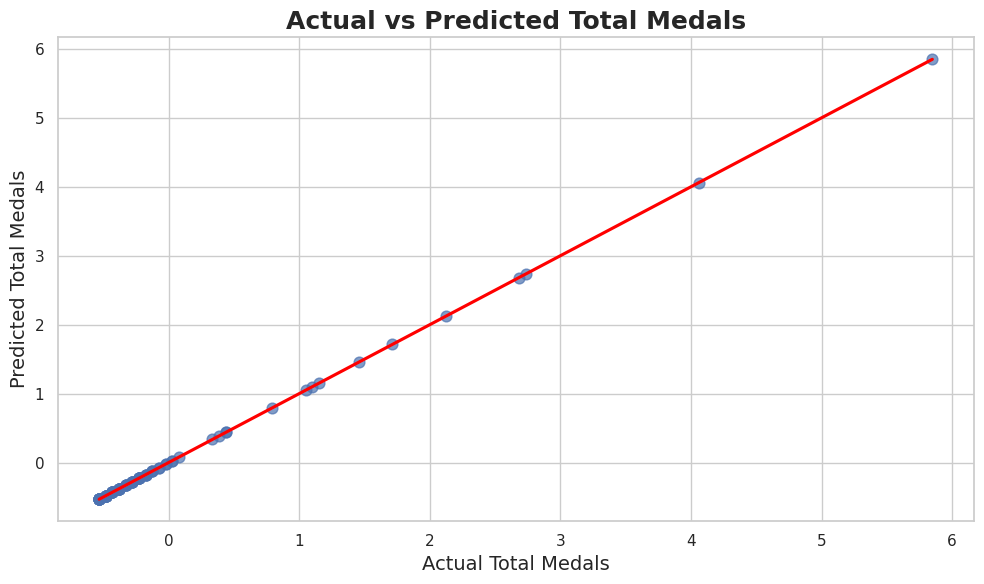

Enter your choice (1-5): 5
Exiting... Goodbye!


In [64]:
def user_interface():
    """Command-line interface for interacting with the AI employee."""
    data = None
    analysis_results = None
    print("Welcome to the AI Employee for Data Analysis and Reporting!")
    print("Please select an option:")
    print("1. Load Data")
    print("2. Clean Data")
    print("3. Perform Analysis")
    print("4. Generate Report")
    print("5. Exit")
    while True:
        choice = input("Enter your choice (1-5): ")
        if choice == '1':
            file_path = input("Enter the file path: ")
            try:
                data = load_data(file_path)
            except ValueError as e:
                print(e)
        elif choice == '2':
            if data is None:
                print("Please load data first.")
            else:
                # Use a different variable name to store the cleaned data
                cleaned_data = clean_data_func(data)  # Call the original clean_data function using a different name
        elif choice == '3':
            if cleaned_data is None:  # Check for cleaned_data
                print("Please load and clean data first.")
            else:
                analysis_results = perform_analysis(cleaned_data)  # Pass cleaned_data
        elif choice == '4':
            if analysis_results is None:
                print("Please perform analysis first.")
            else:
                generate_advanced_report(analysis_results, cleaned_data)  # Pass cleaned_data
        elif choice == '5':
            print("Exiting... Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")
user_interface()

In [65]:
import unittest
class TestAIEmployee(unittest.TestCase):
    def test_load_data(self):
        """Test loading data from a CSV file."""
        data = load_data('/mnt/data/olympic.csv')
        self.assertFalse(data.empty, "Data should not be empty after loading.")
    def test_clean_data(self):
        """Test the data cleaning function."""
        data = load_data('/mnt/data/olympic.csv')
        clean_data_result = clean_data(data)
        self.assertFalse(clean_data_result.isna().any().any(), "There should be no missing values after cleaning.")
    def test_perform_analysis(self):
        """Test the analysis function."""
        data = load_data('/mnt/data/olympic.csv')
        clean_data_result = clean_data(data)
        results = perform_analysis(clean_data_result)
        self.assertIn('model', results, "Analysis should return a model.")
if __name__ == '__main__':
    try:
        unittest.main()
    except SystemExit:
        pass


E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.010s

FAILED (errors=1)
